# **AP155 Lab Assignment Guide** 
## Module 5: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

**Start from this guide and fill in the missing code following the inserted comments (lines starting with #). Explain the solution in your own words (inserting text cells).** 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 25, 25, and 50 points, respectively).

_Due Date_: **December 9 (recommended); January 8 (final)**



### Student Information 

_Full Name (Last Name, First Name)_: Suico, John Samuel\
_Student No._: 2018-05897\
_Section_: WFU-2

### Submission Information

_Date and Time Submitted (most recent upload)_: January 6, 2021 12:30 am

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** John Samuel O. Suico

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/25
* Problem 2 - []/25
* Problem 3 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (25 pts.; 50/50 for code & discussion) 
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits. 

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(15 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$. 

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(10 pts.)*

1. Given a range of equally spaced values of the independent variable $t$ with size $h$ and initial solutions at time $t=0$, the Runge-Kutta method involves solving an ordinary differential equation (ODE) by extrapolating solutions on the slope at time $t + \frac{1}{2}h$ using a Taylor series expansion<sub>[1]</sub>. By performing a series of Taylor expansions, we can arrive at the fourth-order Runge Kutta method: <br><br>
\begin{aligned}
k_1 &= hf(x,t) \\
k_2 & = hf(x+\frac{1}{2}k_1, t+\frac{1}{2}h), \\
k_3 & = hf(x+\frac{1}{2}k_2,t+\frac{1}{2}h), \\
k_4 & = hf(x+k_3,t+h), \\
x(t+h) & = x(t) + \frac{1}{6}(k_1 +2k_2 + 2k_3 + k_4)
\end{aligned}<br>
    with $x$ begin the dependent variable, and $f(x,t)$ being the ODE. For cases involving multiple dependent variables, we can just replace $x$ with a vector $\bf{r}$ containing each depedent variable, and then replace $f(x,t)$ with a vector $\bf{f}$ which contains the differential equations per dependent variable (i.e. can be generalized for any number of independent variables). <br><br>
    For the solution, we first define a function `f(r,t)` with the parameters `r` which is an array that functions as the vector containing the dependent variables (in this case, $x$ and $y$)<sub>[2]</sub>, and `t` for the independent variable. The function `f(r,t)` will be used to calculate each successive $k_n$ and solutions for each ODE using the 4th-order Runge-Kutta method, which is why we define all needed constants, as well as the ODE's for the problem:$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$
    which are represented by the variables `fx` and `fy`, respectively. <br><br>
    We then define each step `h` from 1000 equally spaced steps over the interval `a` to `b`. Then, we use the `numpy` module `arange` function to divide the interval (`b` - `a`) into evenly spaced `h`-width steps, which is useful to create a set of values of the independent variable $t$ to feed into our Runge-Kutta method calculator (and also for graphing). We then define a list of points for both ODE solutions `xpoints` and `ypoints` for the population of prey and predator, respectively (which is to be used for graphing). Then, we define our set of initial conditions for the array `r`, which is also to be used as a storing variable to pass $x$ and $y$ solutions of the ODE to the function `f(r,t)`, and also to our list of solutions `xpoints` and `ypoints`. <br><br>
    Lastly, we calculate the solutions using the 4th-order Runge Kutta method using a `for` loop to go through each value in `tpoints`, calling the function `f(r,t)` multiple times for each iteration and directly following the set of equations above. <br><br>
Footnotes: <br>
[1] The value of $x(t+\frac{1}{2}h)$ is solved using Euler's method <br>
[2] It is useful to store the dependent variables $x$ and $y$ under the same array `r` since Python allows us to perform simultaneous operations on each element of the array.

In [1]:
from math import sin
from numpy import array,arange

#Function to be called for calculation of each step 
def f(r,t): 
    alpha, beta, gamma, delta = 1, 0.5, 0.5, 2
    x = r[0]
    y = r[1]
    fx = alpha*x - beta*x*y
    fy = gamma*x*y - delta*y
    return array([fx,fy],float)

a = 0 # interval start
b = 30 # interval end
N = 1000 # number of slices
h = (b-a)/N

tpoints = arange(a,b,h)
xpoints = []
ypoints = []

r = array([2.0,2.0], float) # initial conditions

#Calculates solutions using 4th-order Runge-Kutta method
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6


2. Here,  we use the `matplotlib.pyplot` module and import it as `plt` to graph the set of solutions `xpoints` and `ypoints` with respect to our independent variables set of values in `tpoints`. The `figure` function sets the dimensions of the figure, while the `plot` function is the "meat" of the code which allows us to plot the population values of the prey and predator with respect to time. We use the functions `xlabel` and `ylabel` to label our axes,`ylim` to set y-axis limits, and `minorticks_on()` improve the view and readability of the graph. The `legend` function creates and sets the position of the graph's legend. <br><br>
    From the graph, we can clearly see the interdependence of the population cycles of predator and prey. As the population of rabbits steadily dwindle, the population of foxes increase due to an increase in the availability of food supply. However, as their food supply decreases, the population of foxes also decrease, which lead to an increase in the population of rabbits since there are less predators to cull their population. Also, the amplitude of the prey's population is much higher than that of the foxes, which is to be expected since the efficiency of energy transfer decreases across each trophic level (i.e. herbivores are more abundant than carnivores).


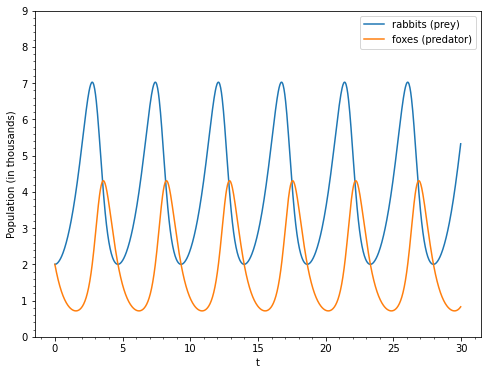

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(tpoints,xpoints,label="rabbits (prey)") # plot curve for population of rabbits/prey
plt.plot(tpoints,ypoints,label="foxes (predator)") # plot curve for population of foxes/predator
plt.xlabel("t") # label horizontal axis
plt.ylabel("Population (in thousands)") # label vertical axis
plt.ylim(0,9) # set y-axis limits

plt.legend(loc="best") # good to keep as is; this adds legend
plt.minorticks_on() # good to keep as is; show minor axis ticks

### PROBLEM 2 (25 pts.; 50/50 for code & discussion)

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(15 pts.)*

2. Make a graph of $\theta$ as a function of time. *(10 pts.)*


1. For a pendulum, the equation of motion is: $$\frac{d^2 \theta}{dt^2} = -mg\sin \theta$$ We can solve this by turning the 2nd order ODE into two simultaneous first order ODE's:
\begin{aligned}
\frac{d\theta}{dt} & = \omega \\
\frac{d\omega}{dt} & = \frac{-g}{l}\sin \theta
\end{aligned}
and solving them both with the same methodology as PROBLEM 1. <br><br>
    We first define the function to be used for calculating each part of the 4th-order Runge-Kutta method as `f(r,t)`, with `r` containing temporarily storing our dependent variables $\theta$ and $\omega$ and `t` containing our independent variable values to be used for each calculation. We then define initial values of $\theta$ and $\omega$ using the variables `theta_i` and `omega_i`<sub>[1]</sub>, respectively. Lastly, we simultaneously solve each equation for 1000 evenly spaced `h`- width steps<sub></sub> and preset $t$ values (in the `tpoints` list) and store our solutions for $\theta$ and $\omega$ to the lists `thetapoints` and `omegapoints`, respectively. <br><br>
    Foototes: <br>
    [1] `omega_i` has a value of 0 rad/s since the pendulum is released from rest.<br>
    [2] from $t=0$ to $t=10$ which is set to the variables `a` and `b` as endpoints of the interval

In [3]:
from math import sin
from numpy import array,arange,pi

# define initial values 
theta_i = 3.124 # units of rad
omega_i = 0 # units of rad/s

#Function to be called for calculation of each step 
def f(r,t):
    g = 9.81 # units of m/s^2
    l = 0.1 # units of m
    x = r[0]
    y = r[1]
    fx = y # insert formula
    fy = -(g/l)*sin(x) # insert formula 
    return array([fx,fy],float)

a =  0 # interval start
b =  10 # interval end
N =  1000 # number of slices
h = (b-a)/N

tpoints = arange(a,b,h)
thetapoints = []
omegapoints = []

r = [theta_i,omega_i]# initial conditions for theta and omega
for t in tpoints:
    thetapoints.append(r[0])
    omegapoints.append(r[1])
    k1 = h*f(r,t)
    k2 = h*f(r+0.5*k1,t+0.5*h)
    k3 = h*f(r+0.5*k2,t+0.5*h)
    k4 = h*f(r+k3,t+h)
    r += (k1+2*k2+2*k3+k4)/6


2. Here, we again import the `matplotlib.pyplot` module as `plt` to plot our data sets. Since python performs calculations on angles in radians, we first convert our solutions stored in `thetapoints` to radians using a "condensed for loop" and store this list of solutions in radian units to the variable `theta`. Then, we use the `plot` function to plot data values of the angular displacement $\theta$ stored in `theta` with respect to time values stored in `tpoints`. We then improve the readability of our graph by setting lines to indicate the amplitude and center of our graph using the `axhline` function, changing graph size using the `figure` function, setting horizontal axis limits using the `xlim` function, adding minor axis ticks using the `minorticks_on` function, and adding axis labels using the `xlabel` and `ylabel` function.


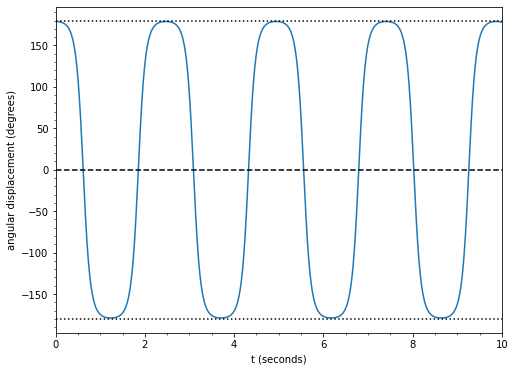

In [4]:
import matplotlib.pyplot as plt
import numpy as np

theta = [i * (180/pi) for i in thetapoints] # convert ```xpoints``` calculated above, from radians to degrees

plt.figure(figsize=(8,6))
plt.plot(tpoints,theta) # plot curve of the angular displacement, theta, over time
# add horizontal guidelines -- good to keep as is
plt.axhline(0, color="black", ls='--')
plt.axhline(180, color="black", ls=':')
plt.axhline(-180, color="black", ls=':')
# add labels for the axes
plt.xlabel("t (seconds)") 
plt.ylabel("angular displacement (degrees)")
# set horizontal axis limits 
plt.xlim(0,10) 
# good to keep as is; this adds minor axis ticks
plt.minorticks_on() 

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Quantum Oscillators**

_Refer to Exercise 8.14 of the Newman text_ Consider the one-dimensional, time-independent Schrodinger equation in a harmonic (i.e., quadratic) potential $V(x) = V_0 x^2 / a^2$, where $V_0$ and $a$ are constants. 

1. Modify the code from Example 8.9 to find the energies of the ground state and the first two excited states for this potential when $m$ is the electron mass, $V_0 = 50$ eV, and $a = 10^{-11}$ m. Note that in theory the wavefunction goes all the way out to $x = \pm \infty$, but you can get good answers by using a large but finite interval. Try using $x = - 10a$ to $+10a$, with the wavefunction $\psi = 0$ at both boundaries. (In effect, you are putting the harmonic oscillator in a box with impenetrable walls.) The wavefunction is real everywhere, so you don't need to use complex variables, and you can use evenly spaced points for the solution-- there is no need to use an adaptive method for this problem.

   The quantum harmonic oscillator is known to have energy states that are equally spaced. Check that this is true, to the precision of your calculation, for your answers. (Hint: The ground state has energy in the range 100 to 200eV.) *(20 pts.)*

2. Modify the code from (1) to calculate the same three energies for the anharmonic oscillator with $V(x) = V_0 x^4 /a^4$, with the same parameter values. *(10 pts.)*

3. Calculate the properly normalized wavefunctions of the anharmonic oscillator for the three states. To normalize the wavefunctions you will have to calculate the value of the integral $\int_{-\infty}^{+\infty} |\psi(x)|^2 {\rm d}x$ and then rescale $\psi$ appropriately to ensure that the area under the square of each of the wavefunctions is 1. Either the trapezoidal rule or Simpson's rule will give you a reasonable value for the integral. *(15 pts.)*

   Note that you may find a few very large values at the end of the array holding the wavefunction. Where do these large values come from? Are they real, or spurious? One simple way to deal with the large values is to make use of the fact that the system is symmetric about its midpoint and calculate the integral of the wavefunction over only the left-hand half of the system, then double the result. This neatly misses out the large values. 

4. Make a plot of the normalized wavefunctions from (3), all on the same axes, as a function of $x$ over a modest range near the origin-- say $x = -5a$ to $x =+5a$. *(5 pts.)*



1. Building on Example 8.9, we can solve the linear, homogenous time-independent Schrödinger equation (TISE) by first expressing it into two simultaneous first-order ODE's: $$ \frac{d\psi}{dx} = \phi, \space \frac{d\phi}{dx} = \frac{2m}{\hbar^2}[V(x)-E]$$ Since this is a boundary problem, we solve it through a method similar to the shooting method, but instead of changing the initial conditions of $\phi$ and $\psi$, we change $E$ such that $\psi = 0$ at both boundaries $x=0$ and $x=L$<sub>[1]</sub> through the secant method<sub>[2]</sub>. We are essentially expressing  $\psi$ as a function of $E$, so that we can apply a root finding method to get the necessary $E$ for $\psi = 0$. <br><br>
    In summary, we are guessing $E$'s (using secant method) through function values of $\psi$ (using 4th-order Runge Kutta method) that tend to zero at the endpoints.<br><br>
    We first define the needed constants for calculating the TISE: `m`, `hbar`, `e`, `V0`, and `a`. The potential is kept as a separate function `V(x)` in order to improve reusability of the code. Then, we define the function to be called for calculating the TISE equation solutions as `f(r,x,E)`, with `r` being the array used to store calculated values of `psi` and `phi`, `x` being the current value for the independent variable, and `E` being the current guessed energy (subsequent values are calculated through secant method). Then, we continue to guess for values of `E` until the difference between the current and subsequent guesses of `E` become less than the target accuracy of `target = 1.602e-22` ($\psi_{x=L}\rightarrow0$) through the `while` loop (for secant method) and the `solve` function (for 4th-order Runge-Kutta method). Also, since we are only concerned with matching the boundary conditions for $\psi$ at $x=L$, we only need to return this particular value (no other possible solutions will occur unless $E$ is correct since $\psi$ is the eigenfunction of the eigenvalue $E$).<br><br>
    For this particular section of the code, we first implement all of the above and guess for the ground state energy E with initial guesses between `E1 = 100*e` and `E2 = 150*e`. We can also check if our solution is correct by printing out the value of `psi2` which is the value of $\psi_{x=L}$ which should be $0$ (may be necessary, since the secant method may not properly converge on the zero of the function if the initial guesses are unlucky). <br><br>
    Footnotes:<br>
    [1] The intial condition $\psi=0$ will be set in the function to be used for calculating solutions. We will only be matching $\psi_{x=L}=0$. Also, the initial value of $\phi$ does not really matter, and only scales our solutions by a certain factor.<br>
    [2] Recall: The secant method calculates the root of a function by taking two points and then calculating guesses based on the derivative of the function at that point: $ x_3 = x_2 - f(x_2) \frac{x_2-x_1}{f(x_2)-f(x_1)}$

In [5]:
from numpy import array,arange

# Define constants
m = 9.1094e-31   # Mass of electron
hbar = 1.0546e-34 # Planck's constant over 2*pi
e = 1.6022e-19   # Electron charge

# Define parameters 
V0 = 50*e # units of Joules
a = 1e-11 # units of m

# Define interval
x1 = -10*a # set interval start 
x2 = 10*a # set interval end
N =  1000 # set number of slices
h = (x2-x1)/N

# Potential function
def V(x):
    return V0*x**2/a**2 # define potential function

#Function to be called for calculation of for psi and phi
def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi 
    fphi = (2*m/hbar**2)*(V(x)-E)*psi
    return array([fpsi,fphi],float)

# Calculate wavefunction values for a particular energy
def solve(E):
    psi = 0.0 # insert initial value
    phi = 1.0 # insert initial value
    r = array([psi,phi],float)
    
    for x in arange(x1,x2,h):
        k1 = h*f(r,x,E)
        k2 = h*f(r+0.5*k1,x+0.5*h,E)
        k3 = h*f(r+0.5*k2,x+0.5*h,E)
        k4 = h*f(r+k3,x+h,E)
        r += (k1+2*k2+2*k3+k4)/6
        
    return r[0]

# Main program to find the energy using the secant method
E1 = 100.0*e # insert inital value of the first (of two) energy values for the secant method -- in units of J
E2 = 150.0*e # insert inital value of the second (of two) energy values for the secant method -- in units of J
psi2 = solve(E1) # solve for the wavefunction for the first value

target = e/1000 # insert target accuracy
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2) # update values for the iteration
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1) # update values for the iteration

E_ground = E2/e # convert energy from Joules to eV and store
print("Psi at endpoint:", psi2)
print("")
print("Ground state E =",E_ground,"eV")

Psi at endpoint: 0.00010864180878552807

Ground state E = 138.02397206082424 eV


For the next energy level, we start guessing with initial values above that of the ground state: `E1 = 250*e` and `E2 = 300*e`. And then, we make another `while` loop (for secant method) which keeps iterating while calling our `solve` function (for Runge-Kutta method) to guess subsequent values of $E$ for which $\psi_{x=L}=0$.

In [6]:
# Find another energy level using the secant method
E1 = 250*e # insert new initial value of the first (of two) energy values for the secant method -- in units of J
E2 = 300*e # insert new initial value of the second (of two) energy values for the secant method -- in units of J
psi2 = solve(E1)

target = e/1000 # insert target accuracy
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2) # update values for the iteration
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1) # update values for the iteration

E_excited1 = E2/e # convert energy from Joules to eV and store
print("Psi at endpoint:", psi2)
print("")
print("First excited state E =",E_excited1,"eV")

Psi at endpoint: -1.1617740312844976e-06

First excited state E = 414.071916541025 eV


Finally, since we know that the difference per consecutive energy level in a harmonic oscillator is equally spaced, we can take the difference between our two initial states $E_0 = 138 \rm eV$ and $E_1 = 414 \rm eV$ to get $\Delta E_{n,n+1} = 276 \rm eV$ which can be used to determine around what range we can start our initial guesses, i.e. $E_2 = E_1 + \Delta E_{n,n+1} = 690\rm eV$. So, we start our initial guesses at `E1 = 680*e` and `e2 = 700*e` and make another `while` loop (for secant method) which keeps iterating while calling our `solve` function (for Runge-Kutta method) to guess subsequent values of $E$ for which $\psi_{x=L}=0$.

In [7]:
# Find another energy level using the secant method
E1 = 680*e # insert new initial value of the first (of two) energy values for the secant method -- in units of J
E2 = 700*e# insert new initial value of the second (of two) energy values for the secant method -- in units of J
psi2 = solve(E1)

target = e/1000 # insert target accuracy
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2) # update values for the iteration
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1) # update values for the iteration


E_excited2 = E2/e
print("Psi at endpoint:", psi2)
print("")
print("Second excited state E =",E_excited2,"eV")

Psi at endpoint: -1.3065691213558511e-08

Second excited state E = 690.119862110466 eV


In [8]:
print("The first and second excited states have energies %.10f and %.10f times the ground energy state" % (E_excited1/E_ground, E_excited2/E_ground)) 

The first and second excited states have energies 3.0000000026 and 5.0000000131 times the ground energy state


Above, we again show the equal spacing between each consecutive energy level: each consecutive energy level has a difference of 2 times the ground energy state.

2. Since the only difference is our potential, we implement the same code in solving PROBLEM 3.1 while only modifying our potential function `V(x)` and our initial guesses `E1 and E2` for calculating each energy level (we can simplify things by only trying to guess a value near our energy level using `E2`, since the secant method will still converge upon the zero). 

In [9]:
def V(x):
    return V0*x**4/a**4
    
E1 = 0.0
E2 = e
psi2 = solve(E1)

target = e/1000 
while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2) 
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)

E_ground2 = E2/e

print("Psi at endpoint:", psi2)
print("Ground state E =",E_ground2,"eV")
print("")

E1 = 0
E2 = 700*e
psi2 = solve(E1)

while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2) 
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)

E_excited12 = E2/e

print("Psi at endpoint:", psi2)
print("First excited state E =",E_excited12,"eV")
print("")

E1 = 0
E2 = 1000*e
psi2 = solve(E1)

while abs(E1-E2)>target:
    psi1,psi2 = psi2,solve(E2) 
    E1,E2 = E2,E2-psi2*(E2-E1)/(psi2-psi1)

E_excited22 = E2/e

print("Psi at endpoint:", psi2)
print("Second excited state E =",E_excited22,"eV")

Psi at endpoint: 1.1816397712420638e+84
Ground state E = 205.30690346934932 eV

Psi at endpoint: -4.500420355721506e+83
First excited state E = 735.6912470387316 eV

Psi at endpoint: -3.7169554182147256e+81
Second excited state E = 1443.569421326075 eV


In [10]:
print("The first and second excited states have energies %.10f and %.10f times the ground energy state" % (E_excited12/E_ground2, E_excited22/E_ground2)) 

The first and second excited states have energies 3.5833731580 and 7.0312756022 times the ground energy state


In this case, since we are dealing with an anharmonic oscillator, it is to be expected that the spacing of the energy levels aren't as exact as a harmonic oscillator. However, lower energy levels do approximate the quantum harmonic oscillator's behavior, which is why the energy gaps of $E_0$ to $E_1$, and $E_1$ to $E_2$ are very similar.

3. Here, we set up a function `get_psi(E)` that uses the 4th-order Runge-Kutta method for calculating solutions to the TISE by calling `f(r,x,E)` which is used for calculating each step of the method. This said function is to be used for calculating solutions of $\psi$ (which aren't normalized, because of the scaling introduced by solving for $\phi$) given our solved values for the energy levels $E_0$, $E_1$ and $E_2$ of the quantum anharmonic oscillator. The function `get_psi(E)` takes an energy level parameter `E` and returns two arrays: 1) a set of $x$ data points and 2) a set of $\psi$ data points ($\psi$ values aren't normalized).<br><br>
Note that our initial conditions for $\psi$ must always be zero at $x=0$, and $\phi$ can be anything but $x=0$ (only scales our solutions by a constant). Also, we define our interval for which we are solving values of $\psi$ to be from $-5a$ to $5a$, $a$ being equal to $10^{-11}$.

In [11]:
import numpy as np

# Define interval
x1 = -5*a # interval start
x2 = 5*a # interval end
N =  1000 # no. of slices
h = (x2-x1)/N

# Potential function
def V(x):
    return V0*x**4/a**4 # insert potential function

def f(r,x,E):
    psi = r[0]
    phi = r[1]
    fpsi = phi
    fphi = (2*m/(hbar**2))*(V(x)-E)*psi
    return array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy and return 2 arrays: x, psi
def get_psi(E):

    # initialize
    tpoints = arange(x1,x2,h) # independent variable values
    psipoints = []            # psi
    phipoints = []          # phi
    
    # set initial conditions
    psi = 0.0 # set initial value
    phi = 1.0 # set initial value
    r = array([psi,phi],float)

    for t in tpoints:
        psipoints.append(r[0])
        phipoints.append(r[1])
        k1 = h*f(r,t,E)
        k2 = h*f(r+0.5*k1,t+0.5*h,E)
        k3 = h*f(r+0.5*k2,t+0.5*h,E)
        k4 = h*f(r+k3,t+h,E)
        r += (k1+2*k2+2*k3+k4)/6

    x_grid = np.array(tpoints)
    psi_grid = np.array(psipoints)
    return x_grid, psi_grid

Here, we reuse our pre-solved energy levels for the anharmonic oscillator from PROBLEM 3.2 and pass their values (converted to Joules from eV) to our function `get_psi(E)` to generate $x$ data points with its corresponding $\psi$ data points, per energy level.

In [12]:
# Getting x and psi values for E_0 of the anharmonic oscillator
E = E_ground2*e
x_grid, psi_grid1 = get_psi(E)

# Getting x and psi values for E_1 of the anharmonic oscillator
E = E_excited12*e
x_grid, psi_grid2 = get_psi(E)

# Getting x and psi values for E_2 of the anharmonic oscillator
E = E_excited22*e
x_grid, psi_grid3 = get_psi(E)

Here, we define the function `get_integral` with parameters `xx` being a set of independent variables, and `yy` being function values with respect to `xx`. The function `get_integral` calculates the integral of a set of function values approximating a curve with respect to $\Delta x$ equally spaced step sizes: $\int_a^b f(x)dx \approx \Delta x[\frac{1}{2}(f(a) + f(b)) + \sum_{k=1}^N-1 f(a+kh)] $. In this case, we will be using the `get_integral` function to calculate the probability density of the anharmonic oscillator's $\psi$ solutions to normalize $\psi$, and so we don't need to introduce a factor $\Delta x$ (since it will be normalized anyway).

In [13]:
def get_integral(xx, yy):
    N = len(xx)
    s = 0.5*yy[0] + 0.5*yy[-1]
    for k in range(1,N):
        s += yy[k]

    return s

To normalize a wavefunction, we calculate for the probability density and equate it to 1: $$A^2\int|\psi|^2dx = 1$$ and then we solve for $A$. So, we call the function `get_integral` for each particular energy level and pass on their respective data sets: $x$ (`x_grid`) for the independent variables and $\psi^2$ for the dependent variables (`psi_grid1` for E_0, `psi_grid2` for E_1, and `psi_grid3` for E_2, ). We square $\psi$ since our values are real and so we don't need to calculate for it's complex conjugate values. Then, we take the solved constants to the power of $-\frac{1}{2}$ to get the multipliers to normalize our wavefunctions.

In [14]:
c1 = get_integral(x_grid,psi_grid1**2)**(-1/2)
c2 = get_integral(x_grid,psi_grid2**2)**(-1/2)
c3 = get_integral(x_grid,psi_grid3**2)**(-1/2)

print("Normalization factors for the first 3 energy states: %.6e, %.6e, %.6e" % (c1,c2,c3))

Normalization factors for the first 3 energy states: 1.111185e+04, 3.952162e+04, 1.206324e+05


Here, we define each normalized wavefunction by simply multiplying the appropriate constants solved from the code block above to the data sets of the solutions to each energy level.

In [15]:
psi_norm1 = c1*psi_grid1 # insert formula
psi_norm2 = c2*psi_grid2 # insert formula
psi_norm3 = c3*psi_grid3 # insert formula

4. Here, we plot the wave function values of each energy level with respect to position. We first non-dimensionalize the x-axis values by dividing it by `a` and assigning it to the variable `xplot`. We then plot the normalized wave function values `psi_norm1`, `psi_norm2`, and `psi_norm3` with respect to `xplot` using the `plot` function. We then improve the readability of our graph by adding axis labels through `xlabel` and `ylabel` functions, adding guidelines through the `axhline` and `axhvline` functions, adding minor axis ticks using the `minorticks_on` function, and adding a graph legend using the `legend` function.

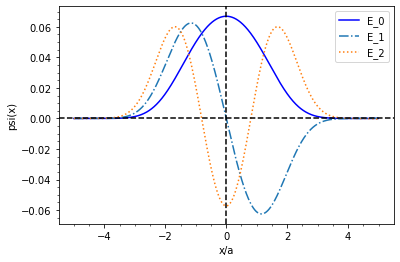

In [16]:
xplot = x_grid/a # plot the scaled position (by a) 
plt.plot(xplot, psi_norm1, color="blue", label = "E_0") # plot wavefunction of ground state 
plt.plot(xplot, psi_norm2, ls = "-.", label = "E_1") # plot wavefunction of first excited state 
plt.plot(xplot, psi_norm3, ls = ":", label = "E_2") # plot wavefunction of second excited state 
# insert guidelines -- OK to keep as is
plt.axhline(0.0, ls='--', color='black')
plt.axvline(0.0, ls='--', color='black')
plt.xlabel("x/a") # label horizontal axis
plt.ylabel("psi(x)") # label vertical axis
plt.minorticks_on()
plt.legend(loc="best") # good to keep as is; this adds legend